In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm

test_size = 200

In [10]:
mu_p = np.random.normal(1, 1, size=(1000+test_size,2))
mu_p_train = mu_p[:1000,:]
mu_p_test = mu_p[1000:,:]
(mu_p_train.shape,mu_p_test.shape)

((1000, 2), (200, 2))

In [11]:
mu_n = np.random.normal(-1, 3, size=(1000+test_size,2))
mu_n_train = mu_n[:1000,:]
mu_n_test = mu_n[1000:,:]
(mu_n_train.shape,mu_n_test.shape)

((1000, 2), (200, 2))

In [12]:
full_p = np.full((1000), 1)
df_p = pd.DataFrame(mu_p_train, columns=['x0','x1'])

full_n = np.full((1000), -1)
df_n = pd.DataFrame(mu_n_train, columns=['x0','x1'])

x_df = pd.concat([df_p,df_n])
y_df = pd.concat([pd.DataFrame(full_p, columns=['y0']),pd.DataFrame(full_n, columns=['y0'])])

In [13]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

gamma in {0.01,0.1,1,10,100,1000\}
SVC(C=1, gamma=0.01)
Support Vectors: 1496
Accuracy: 0.875


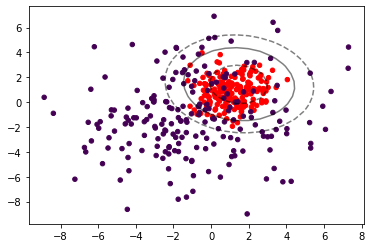

SVC(C=1, gamma=0.1)
Support Vectors: 1174
Accuracy: 0.8825


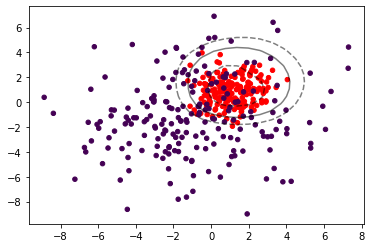

SVC(C=1, gamma=1)
Support Vectors: 1508
Accuracy: 0.8775


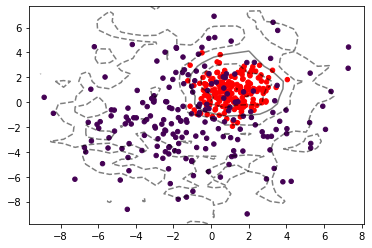

SVC(C=1, gamma=10)
Support Vectors: 2648
Accuracy: 0.8825


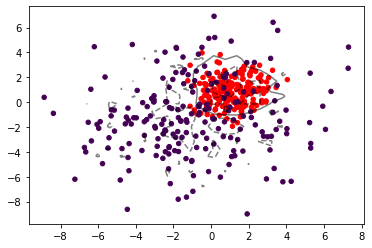

SVC(C=1, gamma=100)
Support Vectors: 3612
Accuracy: 0.8025


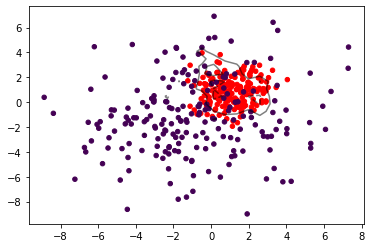

SVC(C=1, gamma=1000)
Support Vectors: 3984
Accuracy: 0.635


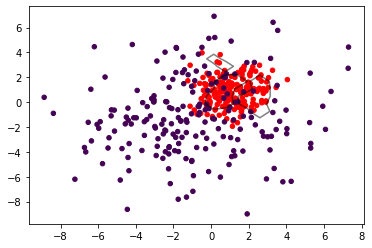

In [6]:
print("gamma in {0.01,0.1,1,10,100,1000\}")
for g in (0.01,0.1,1,10,100,1000):
    rbf = svm.SVC(C=1,  kernel='rbf', gamma=g)
    rbf.fit(x_df, y_df.values.ravel())
    print(rbf)
    test_p = rbf.predict(mu_p_test)
    test_n = rbf.predict(mu_n_test)
    TP = np.count_nonzero(test_p == 1)
    TN = np.count_nonzero(test_n == -1)
    print("Support Vectors:",rbf.support_vectors_.size)
    print("Accuracy:",((TP+TN)/(test_size*2)))
    plt.scatter(mu_p_test[:, 0], mu_p_test[:, 1], c=np.full((test_size),  1), s=20, cmap='autumn')
    plt.scatter(mu_n_test[:, 0], mu_n_test[:, 1], c=np.full((test_size), -1), s=20, cmap='viridis')
    #plt.scatter(rbf.support_vectors_[:, 0], rbf.support_vectors_[:, 1],s=30, lw=1, facecolors='none');
    plot_svc_decision_function(rbf)
    plt.show()

C in {0.01,0.1,1,10,100,1000\}
SVC(C=0.01, gamma=1)
Support Vectors: 3506
Accuracy: 0.845


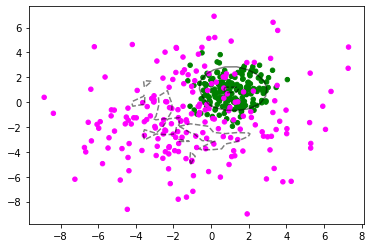

SVC(C=0.1, gamma=1)
Support Vectors: 1826
Accuracy: 0.88


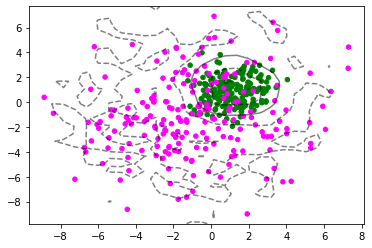

SVC(C=1, gamma=1)
Support Vectors: 1508
Accuracy: 0.8775


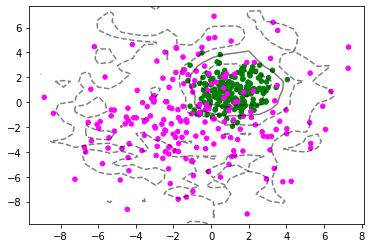

SVC(C=10, gamma=1)
Support Vectors: 1376
Accuracy: 0.88


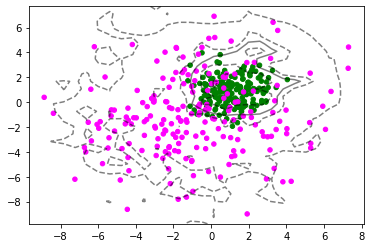

SVC(C=100, gamma=1)
Support Vectors: 1070
Accuracy: 0.88


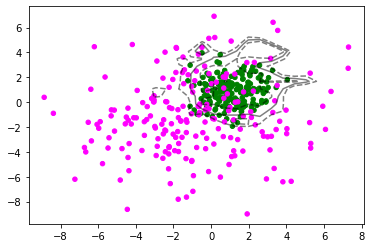

SVC(C=1000, gamma=1)
Support Vectors: 1056
Accuracy: 0.875


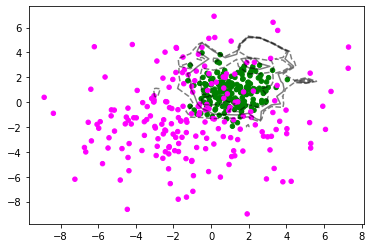

In [7]:
print("C in {0.01,0.1,1,10,100,1000\}")
for c in (0.01,0.1,1,10,100,1000):
    rbf = svm.SVC(C=c,  kernel='rbf', gamma=1)
    rbf.fit(x_df, y_df.values.ravel())
    print(rbf)
    test_p = rbf.predict(mu_p_test)
    test_n = rbf.predict(mu_n_test)
    TP = np.count_nonzero(test_p == 1)
    TN = np.count_nonzero(test_n == -1)
    print("Support Vectors:",rbf.support_vectors_.size)
    print("Accuracy:",((TP+TN)/(test_size*2)))
    plt.scatter(mu_p_test[:, 0], mu_p_test[:, 1], c=np.full((test_size),  1), s=20, cmap='ocean')
    plt.scatter(mu_n_test[:, 0], mu_n_test[:, 1], c=np.full((test_size), -1), s=20, cmap='spring')
    #plt.scatter(rbf.support_vectors_[:, 0], rbf.support_vectors_[:, 1],s=30, lw=1, facecolors='none');
    plot_svc_decision_function(rbf)
    plt.show()

In [8]:
print("Linear kernel")
for c in (0.01,0.1,1,10,100,1000):
    rbf = svm.SVC(C=c,  kernel='linear')
    rbf.fit(x_df, y_df.values.ravel())
    print(rbf)
    test_p = rbf.predict(mu_p_test)
    test_n = rbf.predict(mu_n_test)
    TP = np.count_nonzero(test_p == 1)
    TN = np.count_nonzero(test_n == -1)
    print("Support Vectors:",rbf.support_vectors_.size)
    print("Accuracy:",((TP+TN)/(test_size*2)))

Linear kernel
SVC(C=0.01, kernel='linear')
Support Vectors: 2256
Accuracy: 0.7875
SVC(C=0.1, kernel='linear')
Support Vectors: 2200
Accuracy: 0.7875
SVC(C=1, kernel='linear')
Support Vectors: 2194
Accuracy: 0.785
SVC(C=10, kernel='linear')
Support Vectors: 2194
Accuracy: 0.785
SVC(C=100, kernel='linear')
Support Vectors: 2194
Accuracy: 0.785
SVC(C=1000, kernel='linear')
Support Vectors: 2192
Accuracy: 0.7875
